In [ ]:
#Each csv

import requests
import csv
import time

def fetch_stock_data(symbol, from_date, to_date, items_per_page=50):
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    page_no = 1
    all_data = []

    while True:
        params = {
            "stockSymbol": symbol,
            "fromDate": from_date,
            "toDate": to_date,
            "pageNo": page_no,
            "itemsPerPage": items_per_page,
            "pagePerDisplay": 10
        }

        response = requests.get(url, params=params)
        print(f"Fetching {symbol}, page {page_no} | Status: {response.status_code}")
        if response.status_code != 200:
            print(f"Failed to fetch data for {symbol}: HTTP {response.status_code}")
            break

        data = response.json()
        # Adjust this according to actual API response structure
        stock_data = data.get('result', {}).get('data', [])

        if not stock_data:
            print(f"No more data found for {symbol} at page {page_no}.")
            break  # No more data

        all_data.extend(stock_data)
        print(f"Fetched page {page_no} with {len(stock_data)} records for {symbol}")

        page_no += 1
        time.sleep(0.5)  # small delay to avoid rate limiting

    if all_data:
        keys = all_data[0].keys()
        filename = f"{symbol}.csv"
        with open(filename, 'w', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=keys)
            writer.writeheader()
            writer.writerows(all_data)
        print(f"Data for {symbol} saved to {filename}")
    else:
        print(f"No data found for {symbol}")

if __name__ == "__main__":
    symbols = ["ADBL", "NABIL", "NICA", "NMB", "SBL", "LSL", "KBL", "NBL", "PRVU", "HDL"]
    from_date = "2020-01-01"
    to_date = "2025-05-19"

    for symbol in symbols:
        fetch_stock_data(symbol, from_date, to_date)

## Question 1

# Extact the Price history of ten Commercial banks from given API and save data in .csv format

In [8]:
import requests
import csv
import time

def fetch_stock_data(symbol, from_date, to_date, items_per_page=50):
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    page_no = 1
    stock_all_data = []

    while True:
        params = {
            "stockSymbol": symbol,
            "fromDate": from_date,
            "toDate": to_date,
            "pageNo": page_no,
            "itemsPerPage": items_per_page,
            "pagePerDisplay": 10
        }

        response = requests.get(url, params=params)
        print(f"Fetching {symbol}, page {page_no} | Status: {response.status_code}")
        if response.status_code != 200:
            break

        data = response.json()
        stock_data = data.get('result', {}).get('data', [])

        if not stock_data:
            break

        for row in stock_data:
            row['Symbol'] = symbol  # Add symbol to each row
            stock_all_data.append(row)

        page_no += 1
        time.sleep(0.5)

    return stock_all_data

if __name__ == "__main__":
    symbols = ["NMB", "SBL", "KBL", "MBL", "EBL", "SBI", "HBL", "NABIL", "PRVU", "ADBL"]
    from_date = "2020-01-01"
    to_date = "2025-05-19"
    combined_data = []

    for symbol in symbols:
        data = fetch_stock_data(symbol, from_date, to_date)
        combined_data.extend(data)

    if combined_data:
        keys = combined_data[0].keys()
        with open("stockdata.csv", 'w', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=keys)
            writer.writeheader()
            writer.writerows(combined_data)
        print("All stock data saved to stockdata.csv")


Fetching NMB, page 1 | Status: 200
Fetching NMB, page 2 | Status: 200
Fetching NMB, page 3 | Status: 200
Fetching NMB, page 4 | Status: 200
Fetching NMB, page 5 | Status: 200
Fetching NMB, page 6 | Status: 200
Fetching NMB, page 7 | Status: 200
Fetching NMB, page 8 | Status: 200
Fetching NMB, page 9 | Status: 200
Fetching NMB, page 10 | Status: 200
Fetching NMB, page 11 | Status: 200
Fetching NMB, page 12 | Status: 200
Fetching NMB, page 13 | Status: 200
Fetching NMB, page 14 | Status: 200
Fetching NMB, page 15 | Status: 200
Fetching NMB, page 16 | Status: 200
Fetching NMB, page 17 | Status: 200
Fetching NMB, page 18 | Status: 200
Fetching NMB, page 19 | Status: 200
Fetching NMB, page 20 | Status: 200
Fetching NMB, page 21 | Status: 200
Fetching NMB, page 22 | Status: 200
Fetching NMB, page 23 | Status: 200
Fetching NMB, page 24 | Status: 200
Fetching NMB, page 25 | Status: 200
Fetching NMB, page 26 | Status: 200
Fetching SBL, page 1 | Status: 200
Fetching SBL, page 2 | Status: 200
Fet

## Data Clean

In [14]:
import pandas as pd

df = pd.read_csv("stockdata.csv")
print(df.head())

   sn            tradeDate tradeDateString  maxPrice  minPrice  closingPrice  \
0   1  2025-05-19T00:00:00      2025-05-19     239.7     232.5        238.14   
1   2  2025-05-18T00:00:00      2025-05-18     235.5     232.1        233.63   
2   3  2025-05-15T00:00:00      2025-05-15     237.0     233.0        234.78   
3   4  2025-05-14T00:00:00      2025-05-14     237.8     232.0        235.86   
4   5  2025-05-13T00:00:00      2025-05-13     239.0     235.0        236.36   

   noOfTransactions  volume      amount  previousClosing  differenceRs  \
0               159   46289  10873278.7           233.63          4.51   
1               152   23464   5481661.2           234.78         -1.15   
2               173   50679  11899721.4           235.86         -1.08   
3               118   16850   3967352.5           236.36         -0.50   
4               138   32934   7817091.7           238.74         -2.38   

   percentChange Symbol  
0           1.93    NMB  
1          -0.49    NM

In [24]:
df.info()       
df.isnull().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11735 entries, 0 to 11734
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sn                11735 non-null  int64  
 1   tradeDate         11735 non-null  object 
 2   tradeDateString   11735 non-null  object 
 3   maxPrice          11735 non-null  float64
 4   minPrice          11735 non-null  float64
 5   closingPrice      11735 non-null  float64
 6   noOfTransactions  11735 non-null  int64  
 7   volume            11735 non-null  int64  
 8   amount            11735 non-null  float64
 9   previousClosing   11735 non-null  float64
 10  differenceRs      11735 non-null  float64
 11  percentChange     11735 non-null  float64
 12  Symbol            11735 non-null  object 
dtypes: float64(7), int64(3), object(3)
memory usage: 1.2+ MB


sn                  0
tradeDate           0
tradeDateString     0
maxPrice            0
minPrice            0
closingPrice        0
noOfTransactions    0
volume              0
amount              0
previousClosing     0
differenceRs        0
percentChange       0
Symbol              0
dtype: int64

In [26]:
df.duplicated().sum()

0

## Convert the daily to weekly format and plot it.

<Axes: title={'center': 'Weekly Close Price'}, xlabel='tradeDateNew'>

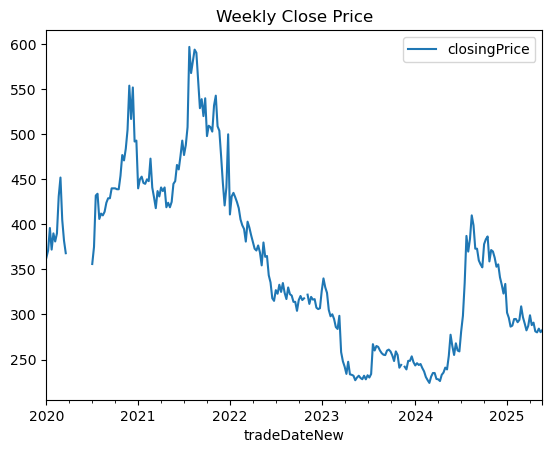

In [29]:
df['tradeDateNew'] = pd.to_datetime(df['tradeDateString'])
df.set_index('tradeDateNew', inplace=True)
weekly_df = df.resample('W').agg({'closingPrice': 'last'})
weekly_df.plot(title='Weekly Close Price')

<Axes: title={'center': 'Monthly Close Price'}, xlabel='tradeDateNew'>

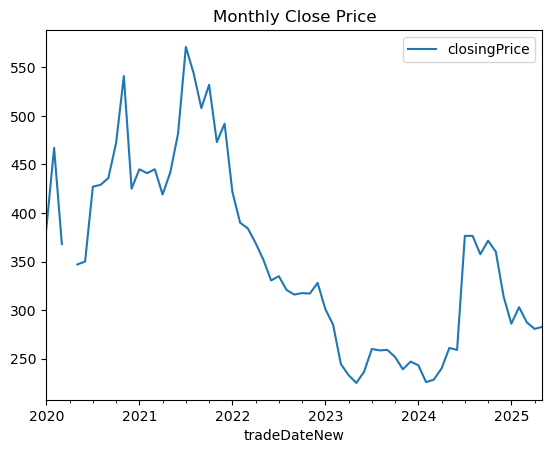

In [31]:
monthly_df = df.resample('ME').agg({'closingPrice': 'last'})
monthly_df.plot(title='Monthly Close Price')

## Calculate the following technical indicators from the data and plot them.

### a. Moving Average

<Axes: title={'center': '14-Day Moving Average'}, xlabel='tradeDateNew'>

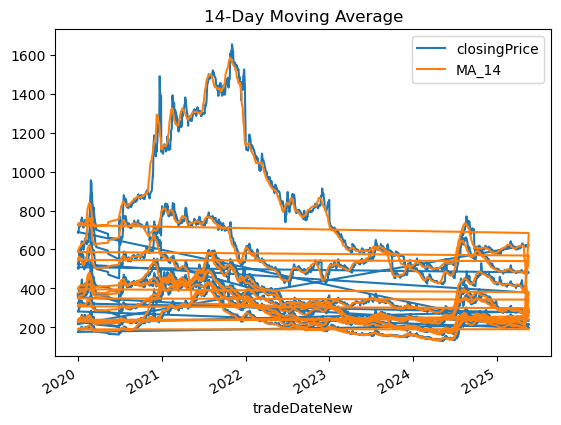

In [34]:
df['MA_14'] = df['closingPrice'].rolling(window=14).mean()
df[['closingPrice', 'MA_14']].plot(title='14-Day Moving Average')

### b. Weighted Moving Average

<Axes: title={'center': '14-Day Weighted Moving Average'}, xlabel='tradeDateNew'>

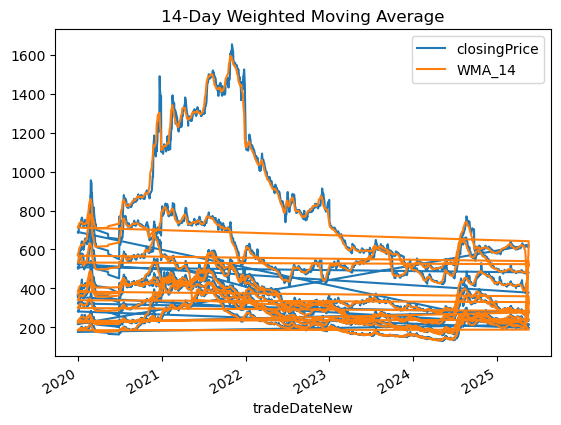

In [40]:
weights = range(1, 15)
def weighted_moving_avg(prices):
    return (prices * weights).sum() / sum(weights)


df['WMA_14'] = df['closingPrice'].rolling(window=14).apply(weighted_moving_avg, raw=True)

df[['closingPrice', 'WMA_14']].plot(title='14-Day Weighted Moving Average')

### c. RSI

<Axes: title={'center': 'RSI (14)'}, xlabel='tradeDateNew'>

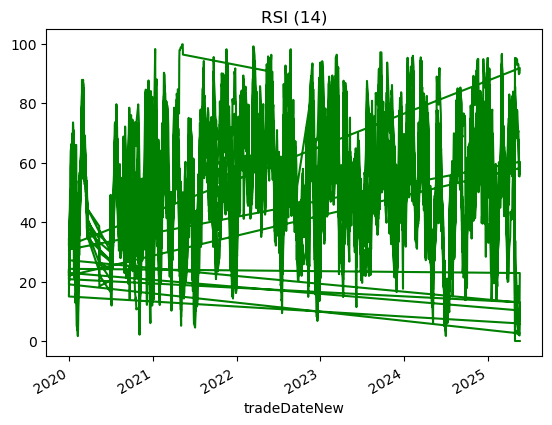

In [43]:
delta = df['closingPrice'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
# Avoid division by zero if avg_loss is 0 or very close to 0
rs = avg_gain / avg_loss
# Handle cases where avg_loss is 0 (RSI would be 100)
rs = rs.replace([float('inf'), -float('inf')], 100)
rs = rs.fillna(0) # Handle cases where both avg_gain and avg_loss are 0
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'].plot(title='RSI (14)', color='Green')

### d. OBV

C:\Users\Acer Nitro\AppData\Local\Temp\ipykernel_18404\200812317.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['OBV'].iloc[0] = df['Volume'].iloc[0]
C:\Users\Acer Nitro\AppData\Local\Temp\ipykernel_18404\200812317.py:12: SettingWit

<Axes: title={'center': 'On-Balance Volume'}, xlabel='tradeDateNew'>

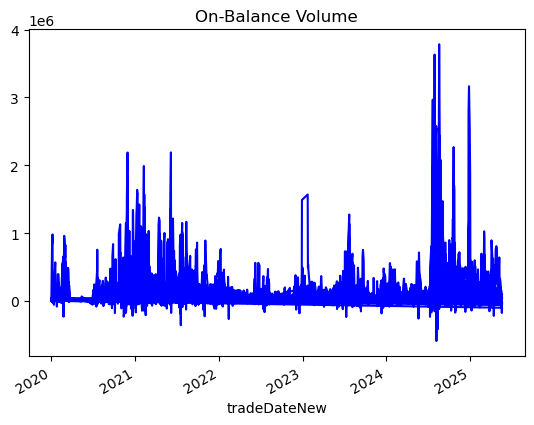

In [46]:
df['Volume'] = df['volume']
df['OBV'] = 0


price_change = df['closingPrice'].diff()


obv_volume = df['Volume'].where(price_change > 0, -df['Volume'].where(price_change < 0, 0))


if len(df) > 0:
    df['OBV'].iloc[0] = df['Volume'].iloc[0]

    df['OBV'] = obv_volume.cumsum() + df['Volume'].iloc[0] - obv_volume.iloc[0]

if len(df) > 0:
    df['OBV_calc'] = df['Volume']

    df.loc[price_change > 0, 'OBV_calc'] = df['Volume'][price_change > 0] + df['OBV_calc'].shift(1)[price_change > 0]
    df.loc[price_change < 0, 'OBV_calc'] = -df['Volume'][price_change < 0] + df['OBV_calc'].shift(1)[price_change < 0]
    df.loc[price_change == 0, 'OBV_calc'] = df['OBV_calc'].shift(1)[price_change == 0]

    # Handle the very first OBV value explicitly if it wasn't set correctly by the above
    df['OBV_calc'].iloc[0] = df['Volume'].iloc[0]

    # Now set the actual OBV column
    df['OBV'] = df['OBV_calc']
    df = df.drop(columns=['OBV_calc']) # Clean up the temporary column


df['OBV'].plot(title='On-Balance Volume', color='Blue')

### e. CCI

<Axes: title={'center': 'CCI (20)'}, xlabel='tradeDateNew'>

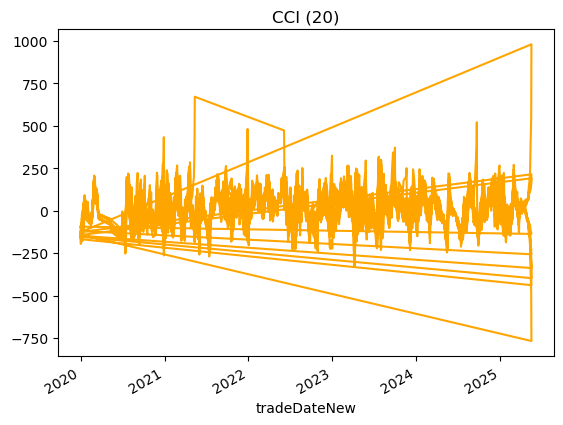

In [55]:
tp = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
tp_ma = tp.rolling(20).mean()
tp_md = (tp - tp_ma).abs().rolling(20).mean()
df['CCI'] = (tp - tp_ma) / (0.015 * tp_md)
df['CCI'].plot(title='CCI (20)', color='orange')
     